<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1><center>K-Nearest Neighbors</center></h1>

В этой лабораторной работе вы загрузите набор данных, обработаете данные и используете K-Nearest Neighbors для прогнозирования точки данных.

** K-Nearest Neighbours ** - это алгоритм контролируемого обучения, где данные «обучены» с помощью точек данных с классификацией. И точка может быть предсказана, учитывая ближайшие к ней точки «K», чтобы определить ее классификацию.

Загрузим необходимые библиотеки

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Представьте себе, что поставщик телекоммуникационных услуг сегментировал свою клиентскую базу по категориям использования услуг, разбивая клиентов на четыре группы. Если для прогнозирования членства в группе можно использовать демографические данные, компания может настроить предложения для отдельных потенциальных клиентов. Это проблема классификации. То есть, учитывая набор данных с предопределенными метками, нам нужно построить модель, которая будет использоваться для прогнозирования категории нового или неизвестного случая.

Пример использует демографические данные, таких как регион, возраст и семейное положение, для прогнозирования моделей использования.

Поле назначения, называемое __custcat__, имеет четыре возможных значения, которые соответствуют четырем группам клиентов, а именно:
   1- Базовое обслуживание
   2- Электронное обслуживание
   3- Плюс Сервис
   4- Полный сервис

Наша цель - построить классификатор, чтобы предсказать категории неизвестных случаев. Мы будем использовать определенный тип классификации, называемый K-ближайшие соседи.

### Загрузим данные из файла CSV 

In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

<div id="visualization_analysis">
    <h2>Визуализация и анализ данных</h2> 
</div>


#### Давайте посмотрим, сколько категорий находится в нашем наборе данных

In [4]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-Service, 236 Total Service и 217 клиентов E-Service


Вы можете легко исследовать данные, используя методы визуализации:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000136B25C9488>]],
      dtype=object)

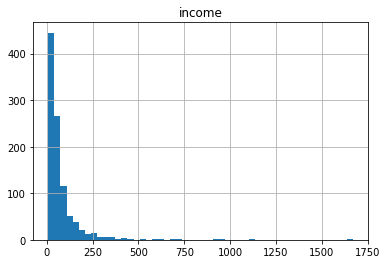

In [5]:
df.hist(column='income', bins=50)

### Набор свойств

Определим наборы свойств, X:

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Чтобы использовать библиотеку scikit-learn, мы должны преобразовать фрейм данных Pandas в массив Numpy:

In [7]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

Каковы наши метки?

In [8]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Нормализовать данные

Стандартизация данных дает нулевое среднее значение данных и единичную дисперсию, это хорошая практика, особенно для таких алгоритмов, как KNN, которые основаны на расстоянии случаев:

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

Точность выборки - это процент правильных прогнозов, которые модель делает на основе данных, на которых модель НЕ обучалась. Проведение тренинга и тестирование на одном и том же наборе данных, скорее всего, будет иметь низкую точность вне выборки из-за вероятности чрезмерного соответствия.

Важно, чтобы наши модели имели высокую точность вне выборки, потому что цель любой модели, конечно, состоит в том, чтобы делать правильные прогнозы на неизвестных данных. Итак, как мы можем улучшить точность вне выборки? Одним из способов является использование оценочного подхода под названием Train/Test Split.
Разделение обучения/теста включает в себя разделение набора данных на наборы обучения и тестирования, которые являются взаимоисключающими. После этого вы обучаете с набором обучения и тестируете с тестовым набором.

Это обеспечит более точную оценку точности вне выборки, поскольку тестовый набор данных не является частью набора данных, который использовался для обучения данных. Это более реально для реальных задач.


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


<div id="classification">
    <h2>Классификация</h2>
</div>

<h3>K nearest neighbor (KNN)</h3>

#### Импортируем библиотеку

Классификатор, реализующий голосование по ближайшим соседям.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

### Обучение

Давайте начнем алгоритм с k = 4:

In [12]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

### Прогноз
мы можем использовать модель для прогнозирования тестового набора:

In [13]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

### Оценка точности
В много меточной классификации оценка точности __accuracy classification score__ является функцией, которая вычисляет точность подмножества. Эта функция равна функции jaccard_similarity_score. По сути, она вычисляет, насколько близко фактические метки и прогнозируемые метки совпадают в тестовом наборе.

In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


## Практика
Можете ли вы построить модель снова, но на этот раз с k = 6?

In [15]:
# write your code here




Дважды щелкните __здесь__ чтобы увидеть решение.

<!-- Your answer is below:
    
    
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

-->

#### А как насчет других K?
K в KNN - это количество ближайших соседей для проверки. Это должно быть указано Пользователем. Итак, как мы можем выбрать правильное значение для K?
Общее решение - зарезервировать часть ваших данных для проверки точности модели. Затем выберите k = 1, используйте обучающую часть для моделирования и рассчитайте точность прогноза, используя все выборки в вашем тестовом наборе. Повторите этот процесс, увеличив k, и посмотрите, какое k лучше для вашей модели.

Мы можем рассчитать точность KNN для разных K.

In [16]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

#### Точность модели для разного количества соседей

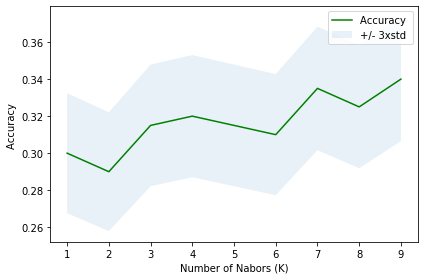

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
